In [15]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from math import ceil

In [2]:
image = cv2.imread('cats.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

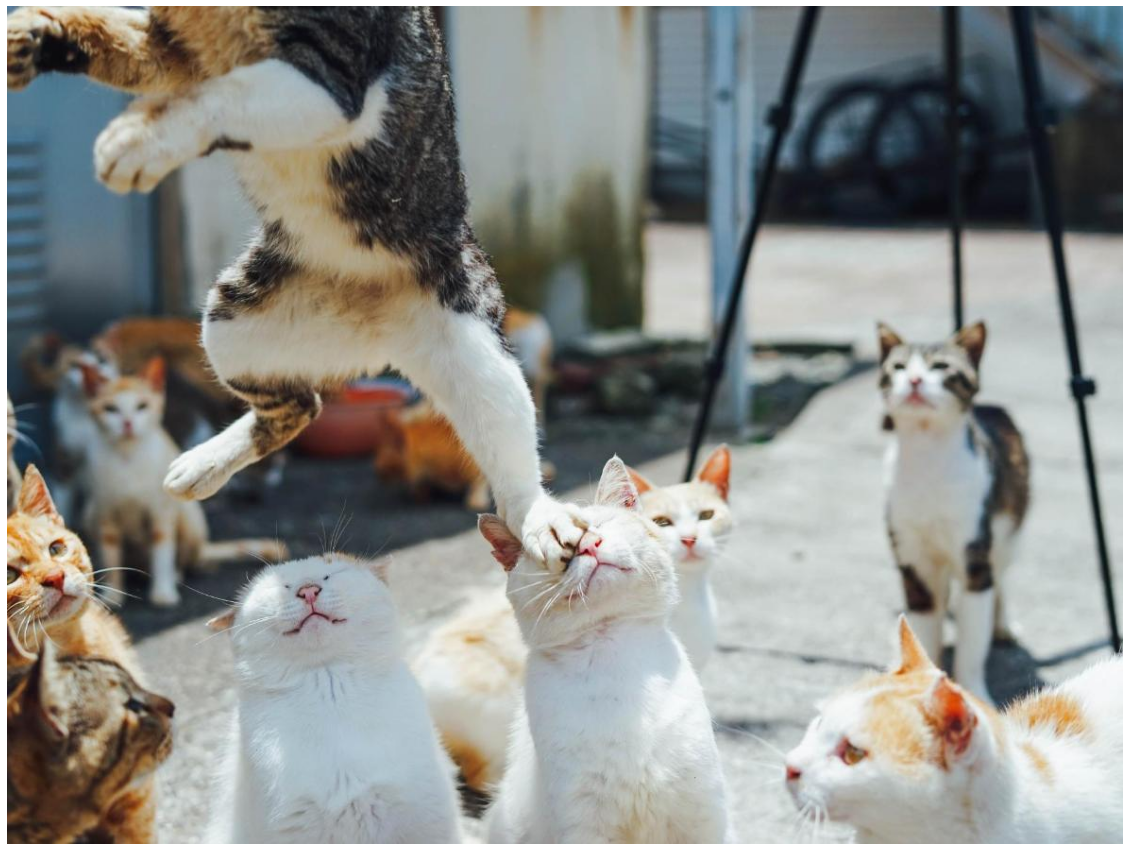

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [9]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

#CHANGE TO YOUR MODEL LOCATION
sam_checkpoint = "/workspace/jupyter/models/sam_vit_h_4b8939.pth"
# sam_checkpoint = "/workspace/jupyter/models/sam_vit_b_01ec64.pth"
model_type = "vit_h"

# comment both lines to run on CPU
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(model=sam,points_per_side=48)

In [10]:
masks = mask_generator.generate(image)

In [11]:
print(len(masks))
print(masks[0].keys())

110
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


In [12]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

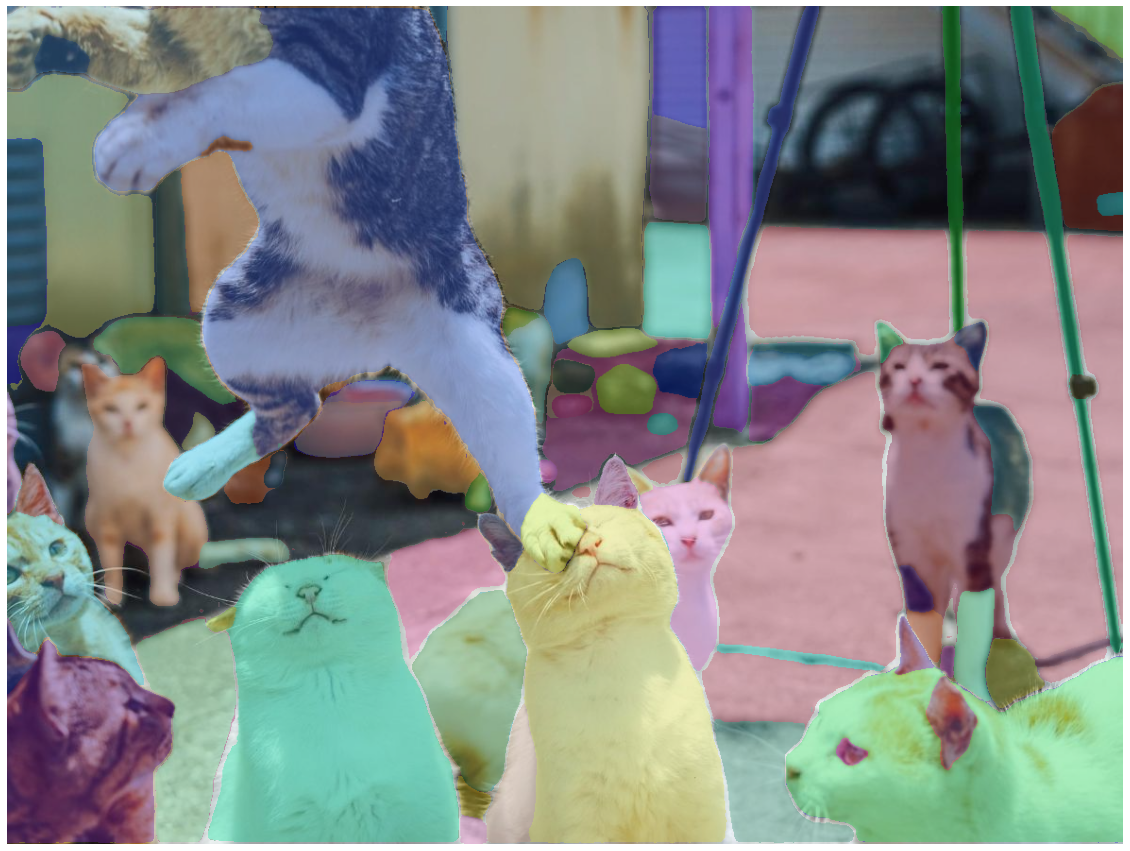

In [25]:

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.savefig('catsPretty.png')
plt.show() 

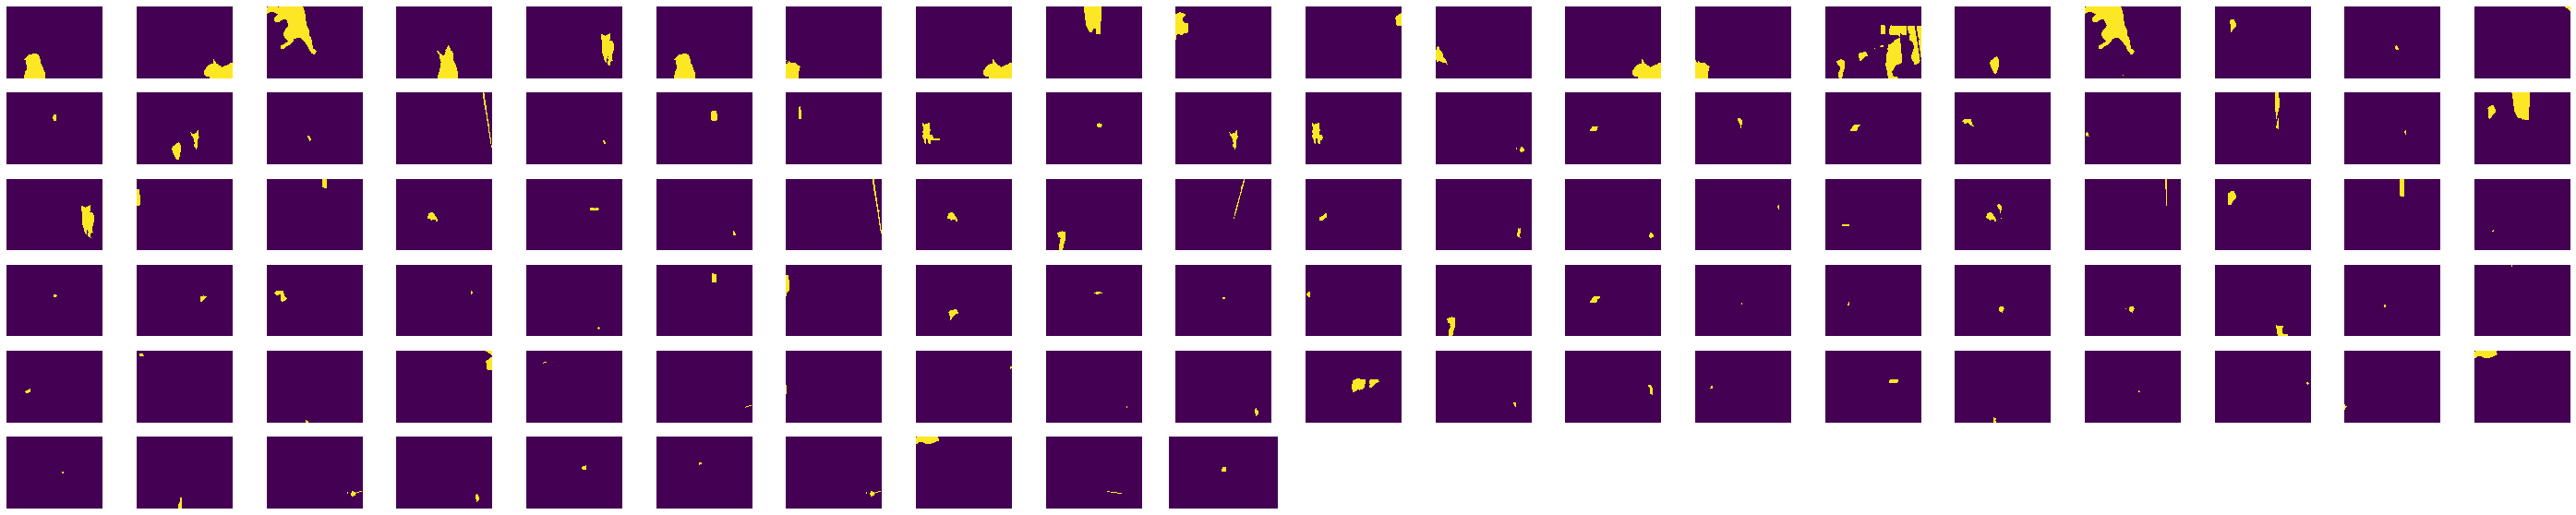

In [30]:
plt.figure(figsize=(50,10))
for i,mask in enumerate(masks):
    plt.subplot(ceil(len(masks)/20),20,i+1)
    plt.imshow(mask['segmentation'], interpolation='nearest')
    plt.axis('off')
plt.axis('tight')
plt.savefig('allmasks.png')
plt.show()